<h4>IMP lib</h4>

In [2]:
pip install numpy pandas matplotlib jupyterlab seaborn jupyter_contrib_nbextensions scikit-learn scikit-image Pillow pmdarima imblearn xgboost folium statsmodels tqdm

In [3]:
pwd

'C:\\Users\\duasp\\Machine Learning'

In [4]:
cd ..

C:\Users\duasp


In [5]:
cd ..

C:\Users


In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 985B-2269

 Directory of C:\Users

09/02/2024  07:42 AM    <DIR>          .
09/02/2024  07:42 AM    <DIR>          ..
10/21/2024  09:21 AM    <DIR>          duasp
08/23/2023  12:06 PM    <DIR>          Public
08/27/2024  10:01 PM    <DIR>          rajesh
08/28/2024  03:50 PM    <DIR>          rajesha
               0 File(s)              0 bytes
               6 Dir(s)  138,865,516,544 bytes free


In [7]:
cd duasp/Desktop/

C:\Users\duasp\Desktop


<h4>EDA</h4>

In [9]:
pwd

'C:\\Users\\duasp\\Desktop'

In [10]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [11]:
#define and set random state
RANDOM_STATE=24 #None
np.random.seed(RANDOM_STATE)#set random seed for reproducible results

In [12]:
#parameters for  Matplotlib
params={'legend.fontsize':'small',
        'figure.figsize':(15,5),
        'axes.titlesize':'medium',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium',
        'savefig.dpi':75,
        'image.interpolation':'none',
        'savefig.bbox':'tight',
        'lines.linewidth':1,
        'legend.numpoints':1
    
}

CMAP=plt.cm.rainbow
plt.rcParams.update(params) #update the matplotlib parameters
plt.set_cmap(CMAP)

<Figure size 1500x500 with 0 Axes>

In [13]:
df = pd.read_csv("../Machine Learning/StudentsPerformance.csv")

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
for col in df.columns:
    colCount=df[col]
    print(colCount)

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object
0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object
0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object
0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length:

gender:gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity:race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education:parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch:lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course:test preparation course
none         642
completed    358
Name: count, dtype: int64


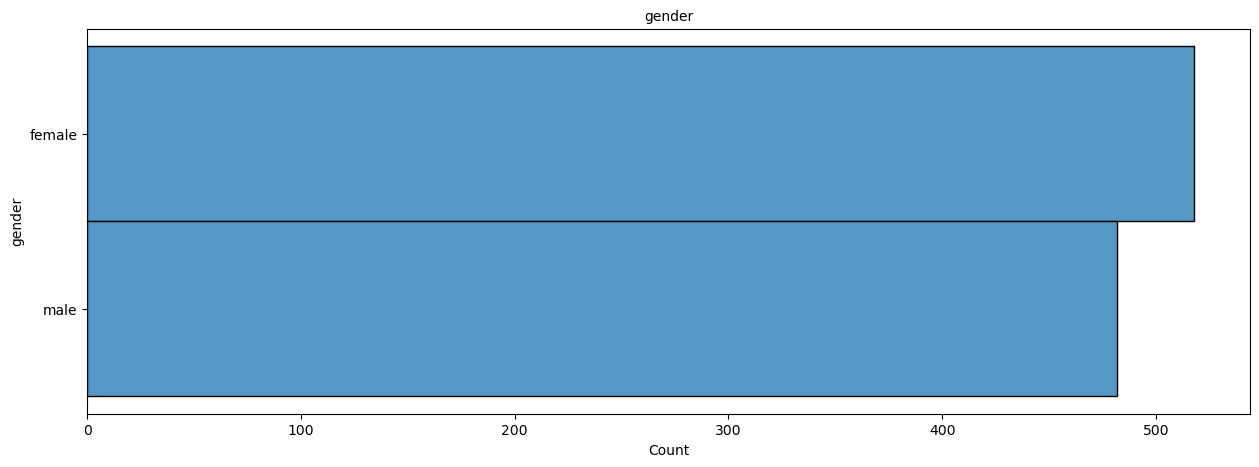

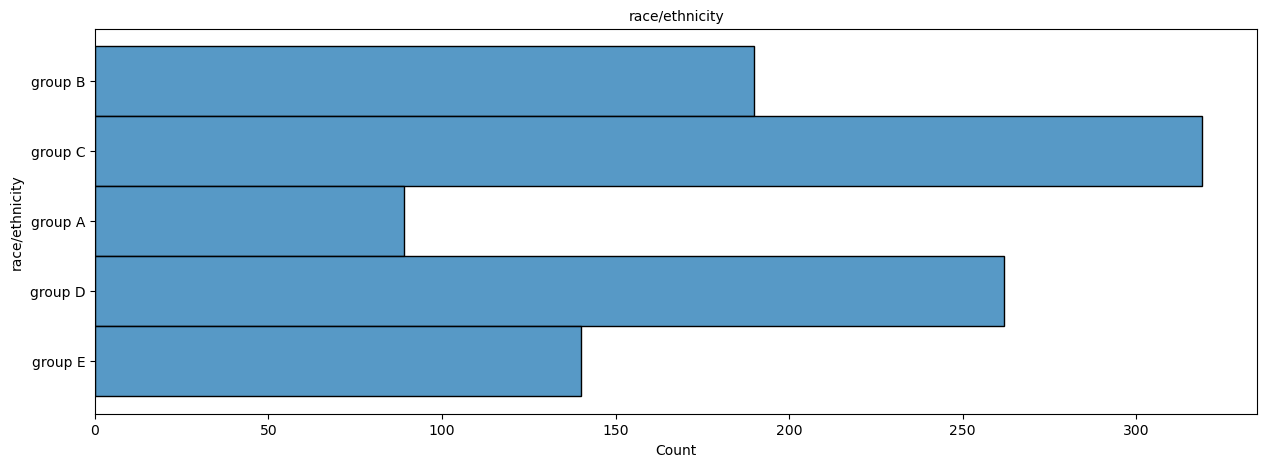

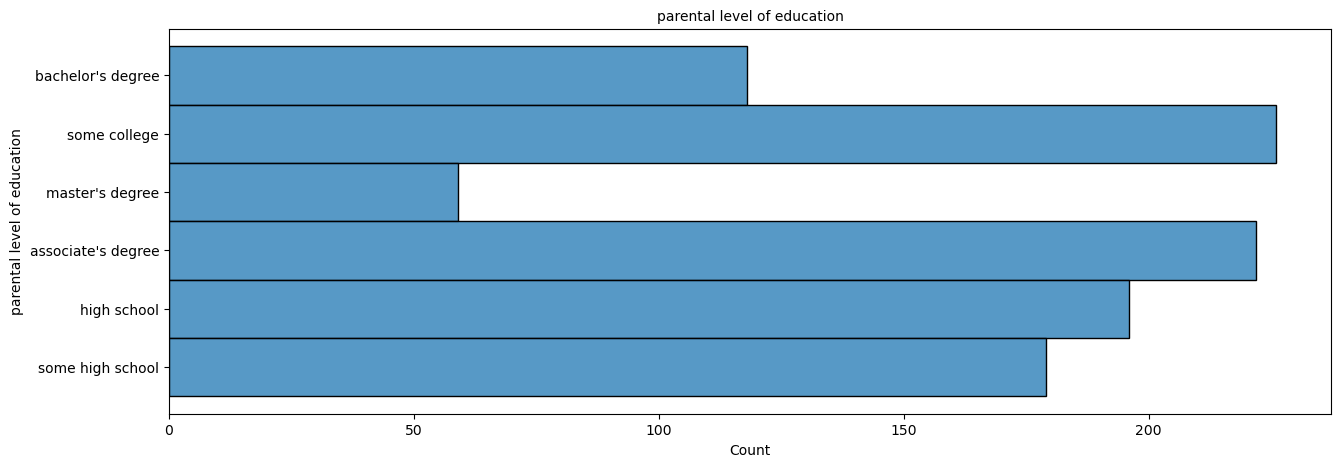

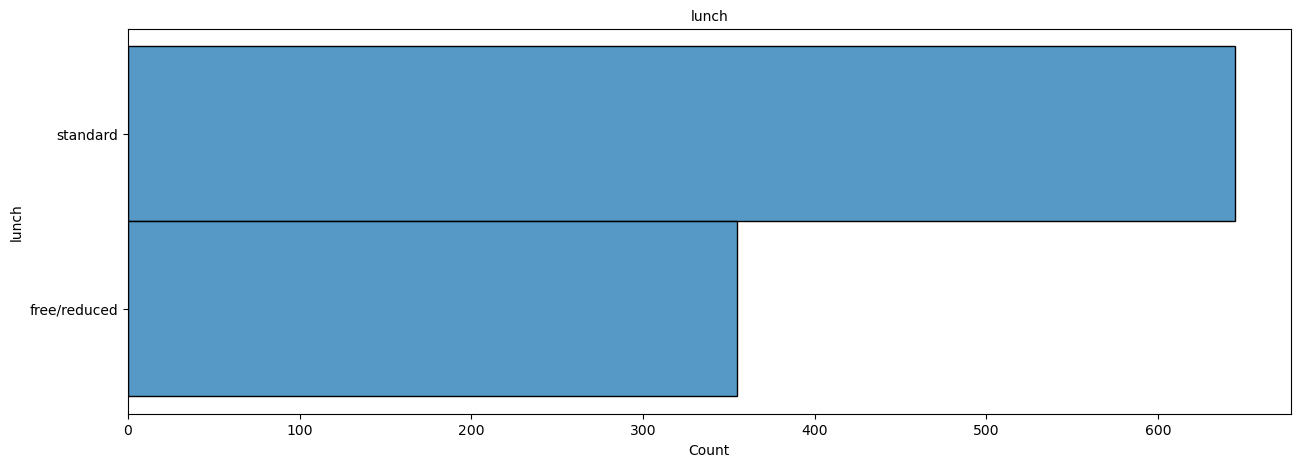

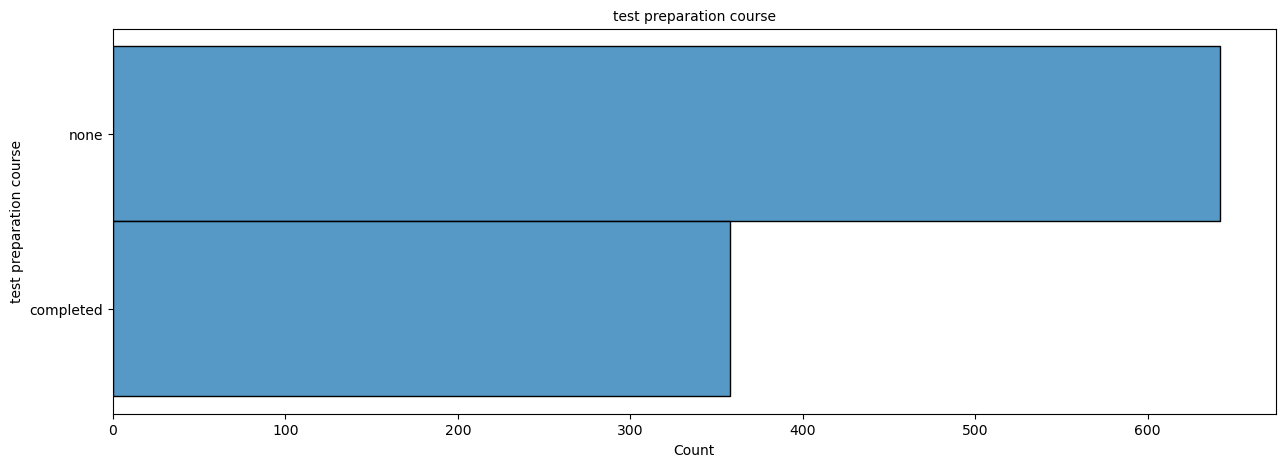

In [20]:
cat_col=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

for col in cat_col:
    fig,ax=plt.subplots()
    colCount=df[col].value_counts()
    ax.set_title(col)
    sns.histplot(data=df,y=col,ax=ax)
    print(f'{col}:{colCount}')

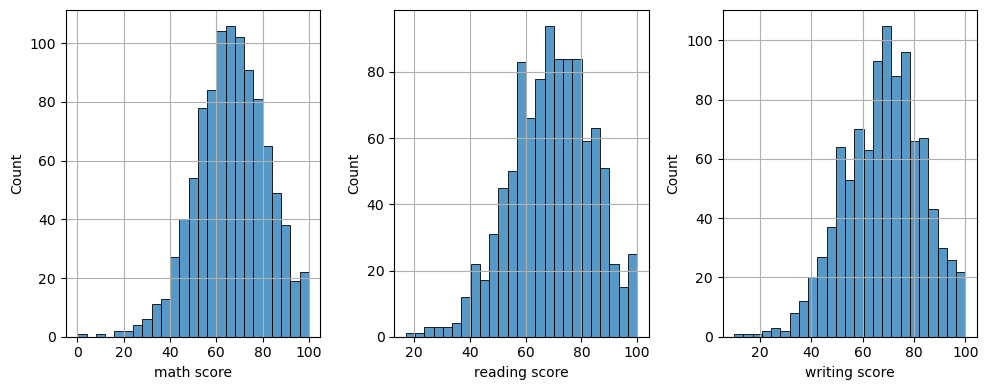

In [21]:
#select numberical columns
num_col=['math score', 'reading score',
       'writing score']
#fig and axs for plotting
fig,axes=plt.subplots(1,3,figsize=(10,4))
#iterate over columns
for count, col in enumerate(num_col):
    ax=axes[count] #pick an axis to plot
    sns.histplot(data=df,x=col,ax=ax,bins=25) #draw histogram and iterate over bins
    ax.grid(True) #display grids
plt.tight_layout()#make it neat

In [22]:
df[['gender','math score']].groupby(['gender'],as_index=False).mean().round(2)

,gender,math score
0,female,63.63
1,male,68.73


In [23]:
df[['gender','reading score']].groupby(['gender'],as_index=False).mean().round(2)

,gender,reading score
0,female,72.61
1,male,65.47


In [24]:
df[['gender','writing score']].groupby(['gender'],as_index=False).mean().round(2)

,gender,writing score
0,female,72.47
1,male,63.31


<Axes: >

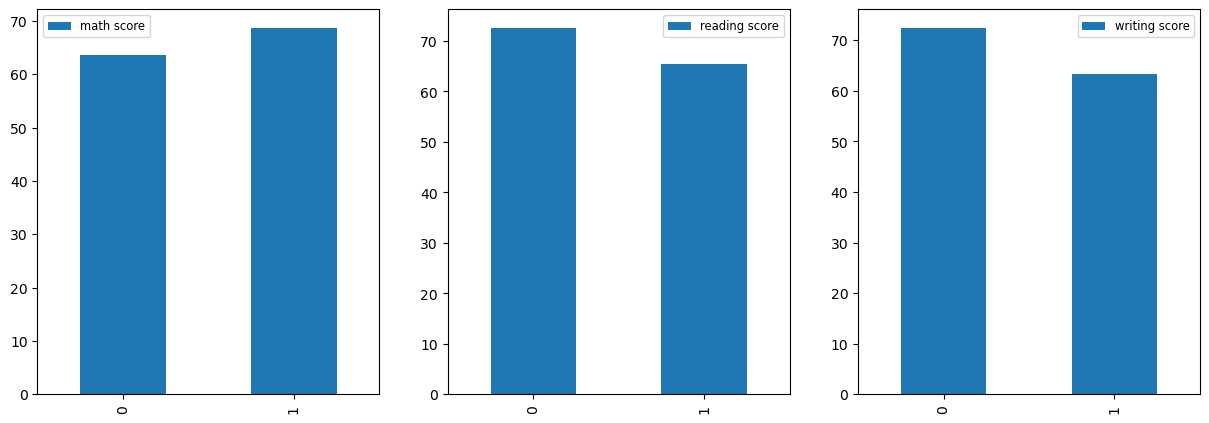

In [25]:
fig,axes=plt.subplots(1,3)

df[['gender','math score']].groupby(['gender'], as_index=False).mean().plot(kind='bar',ax=axes[0])
df[['gender','reading score']].groupby(['gender'], as_index=False).mean().plot(kind='bar',ax=axes[1])
df[['gender','writing score']].groupby(['gender'], as_index=False).mean().plot(kind='bar',ax=axes[2])

Text(0.5, 0.98, 'Race/ethnicity')

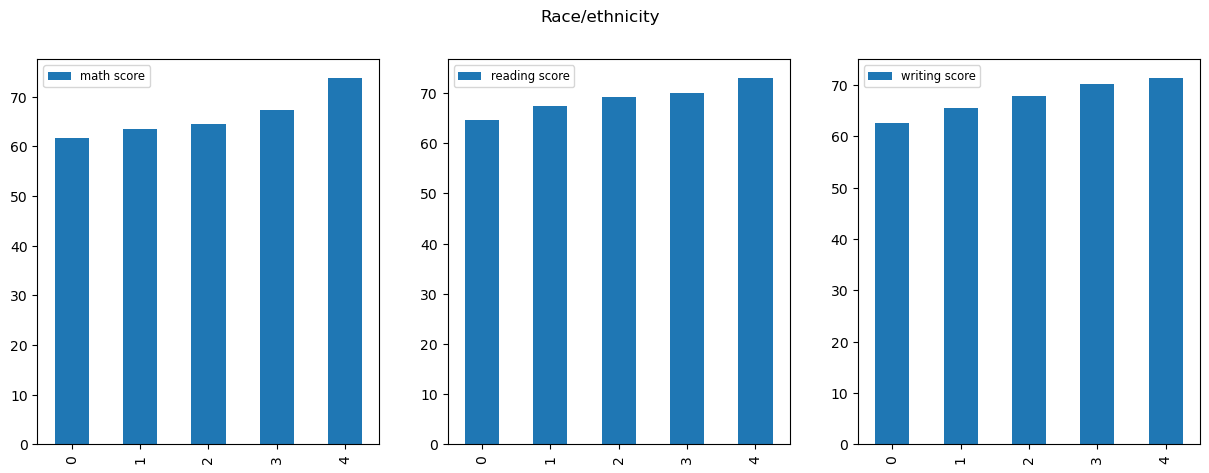

In [26]:
fig,axes=plt.subplots(1,3)
col = cat_col[1]

df[[col,'math score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[0])
df[[col,'reading score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[1])
df[[col,'writing score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[2])

plt.suptitle(col.capitalize())

Text(0.5, 0.98, 'Parental level of education')

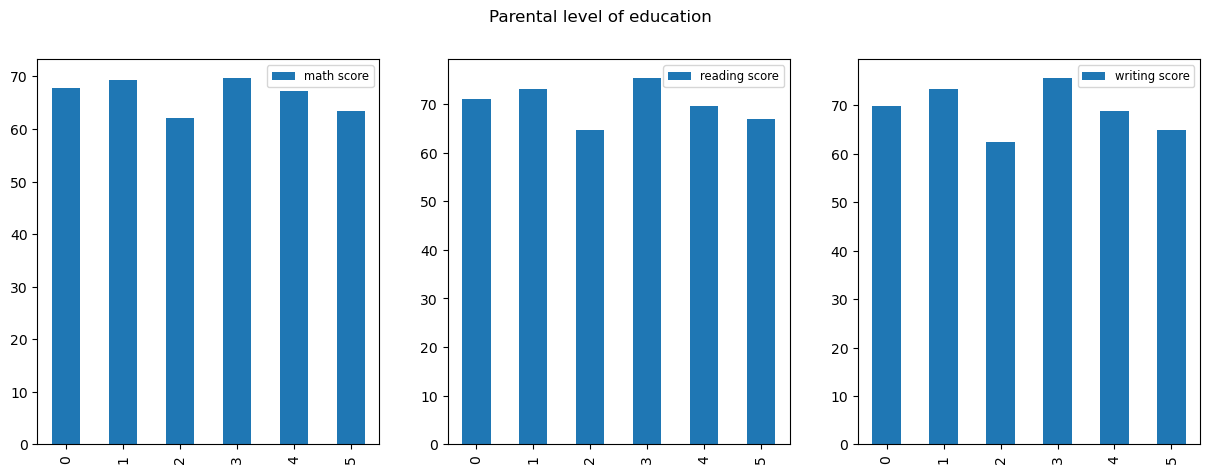

In [27]:
fig,axes=plt.subplots(1,3)
col = cat_col[2]

df[[col,'math score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[0])
df[[col,'reading score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[1])
df[[col,'writing score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[2])

plt.suptitle(col.capitalize())

Text(0.5, 0.98, 'Lunch')

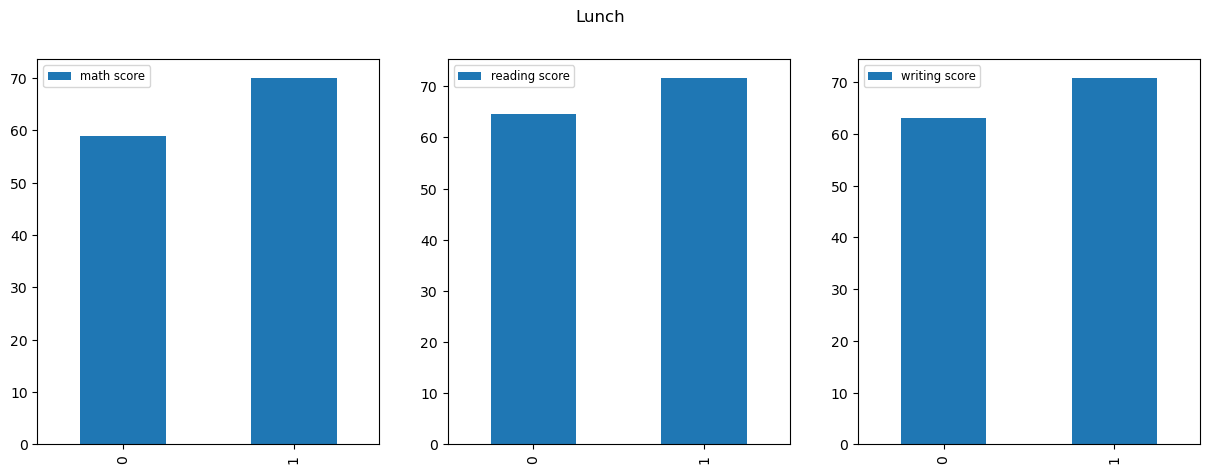

In [28]:
fig,axes=plt.subplots(1,3)
col = cat_col[3]

df[[col,'math score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[0])
df[[col,'reading score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[1])
df[[col,'writing score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[2])

plt.suptitle(col.capitalize())

Text(0.5, 0.98, 'Test preparation course')

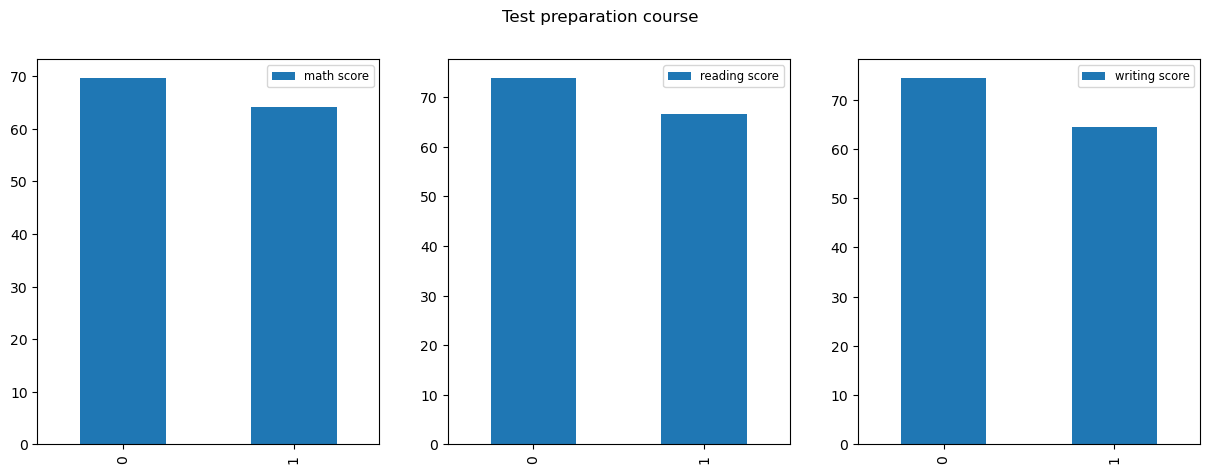

In [29]:
fig,axes=plt.subplots(1,3)
col = cat_col[4]

df[[col,'math score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[0])
df[[col,'reading score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[1])
df[[col,'writing score']].groupby([col], as_index=False).mean().plot(kind='bar',ax=axes[2])

plt.suptitle(col.capitalize())

<h4>outliers.. Really?</h4>

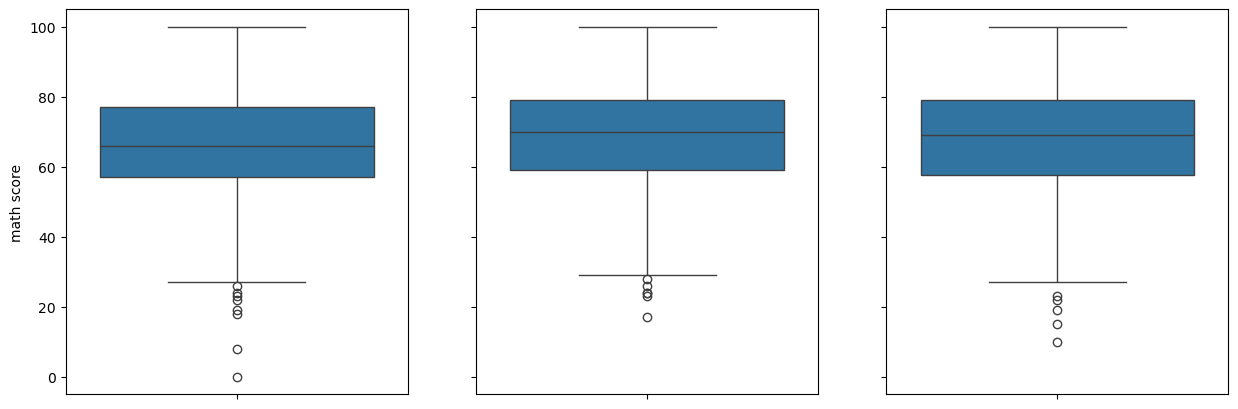

In [88]:
fig, axes = plt.subplots(1,3,sharey=True)
sns.boxplot(data = df, y = 'math score', ax =axes[0])

sns.boxplot(data = df, y = 'reading score', ax =axes[1])

sns.boxplot(data = df, y = 'writing score', ax =axes[2])

plt.show()

In [32]:
Q1=np.percentile(df['math score'],25)
Q3=np.percentile(df['math score'],75)
IQR=(Q3-Q1)
outlier_dis=IQR*1.5
outlier=df[df['math score']<Q1-outlier_dis].index
outlier


outlier_list=[]
outlier_list.extend(outlier)
outlier_list

[17, 59, 145, 338, 466, 787, 842, 980]

In [33]:
Q1=np.percentile(df['reading score'],25)
Q3=np.percentile(df['reading score'],75)
IQR=(Q3-Q1)
outlier_dis=IQR*1.5
outlier=df[df['reading score']<Q1-outlier_dis].index
outlier_list.extend(outlier)
outlier_list


[17, 59, 145, 338, 466, 787, 842, 980, 59, 76, 211, 327, 596, 980]

In [34]:
Q1=np.percentile(df['writing score'],25)
Q3=np.percentile(df['writing score'],75)
IQR=(Q3-Q1)
outlier_dis=IQR*1.5
outlier=df[df['writing score']<Q1-outlier_dis].index
outlier_list.extend(outlier)
outlier_list

[17,
 59,
 145,
 338,
 466,
 787,
 842,
 980,
 59,
 76,
 211,
 327,
 596,
 980,
 59,
 76,
 327,
 596,
 980]

In [35]:
Counter(outlier_list)

Counter({59: 3,
         980: 3,
         76: 2,
         327: 2,
         596: 2,
         17: 1,
         145: 1,
         338: 1,
         466: 1,
         787: 1,
         842: 1,
         211: 1})

In [36]:
df.iloc[[59,980]]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23


<Axes: xlabel='gender', ylabel='overall'>

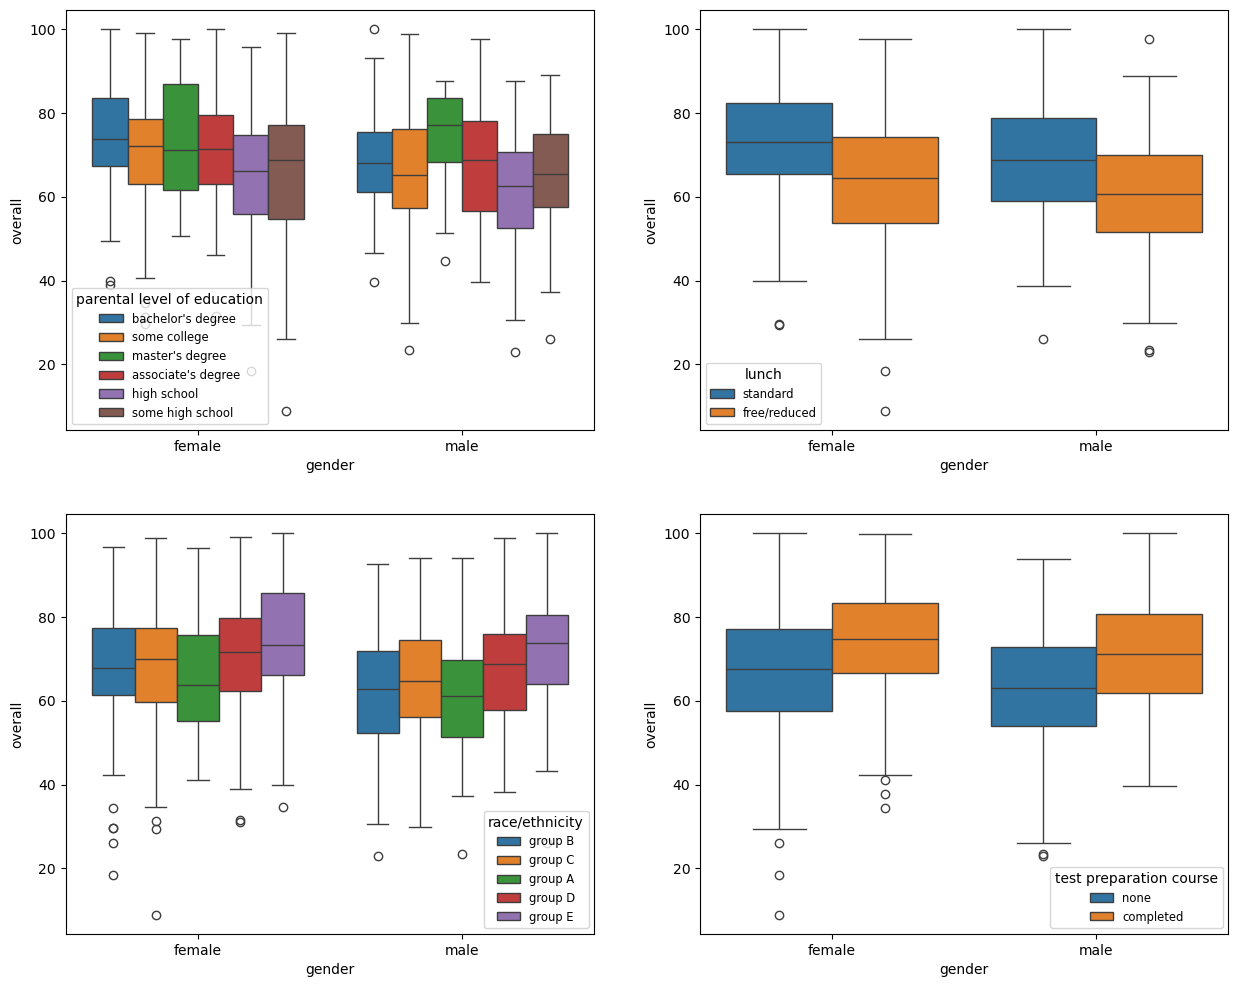

In [92]:
df['overall'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

fig = plt.figure(figsize=(15,12))

ax=fig.add_subplot(221)
sns.boxplot(data=df,x='gender',
            y='overall'
            ,hue='parental level of education',
            ax=ax)
#parental education level helps in score

ax=fig.add_subplot(222)
sns.boxplot(data=df,x='gender',
            y='overall',
            hue='lunch',
            ax=ax)
#standard lunch helps

ax=fig.add_subplot(223)
sns.boxplot(data=df,x='gender',
            y='overall',
            hue='race/ethnicity',
            ax=ax)

ax=fig.add_subplot(224)
sns.boxplot(data=df,x='gender',
            y='overall',
            hue='test preparation course',
            ax=ax)
#test preparation helps

<Axes: xlabel='gender', ylabel='overall'>

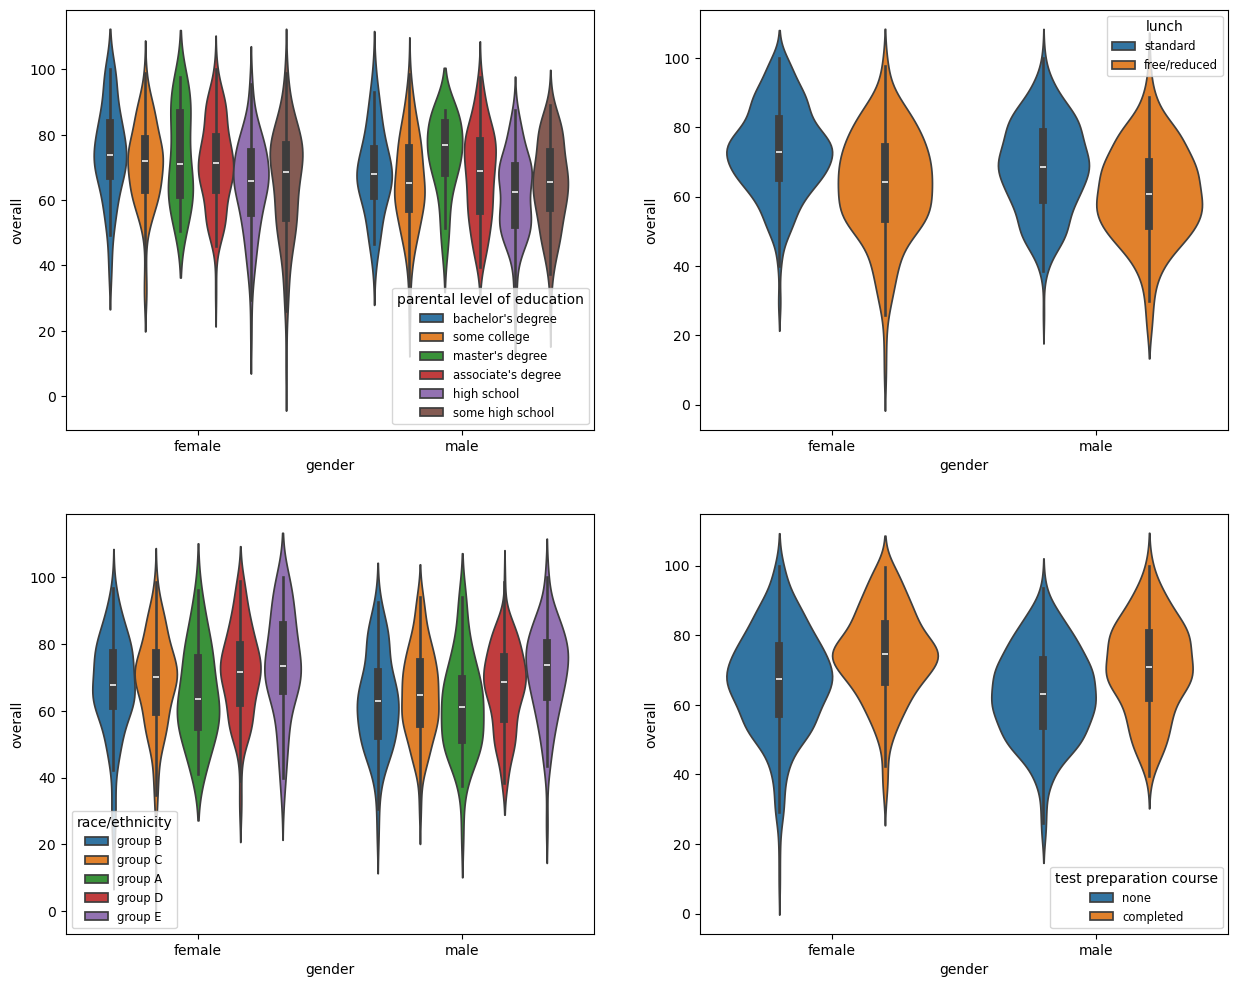

In [38]:
fig = plt.figure(figsize=(15,12))

ax=fig.add_subplot(221)
sns.violinplot(data=df,x='gender',
            y='overall'
            ,hue='parental level of education',
            ax=ax)
#parental education level helps in score

ax=fig.add_subplot(222)
sns.violinplot(data=df,x='gender',
            y='overall',
            hue='lunch',
            ax=ax)
#standard lunch helps

ax=fig.add_subplot(223)
sns.violinplot(data=df,x='gender',
            y='overall',
            hue='race/ethnicity',
            ax=ax)

ax=fig.add_subplot(224)
sns.violinplot(data=df,x='gender',
            y='overall',
            hue='test preparation course',
            ax=ax)
#test preparation helps

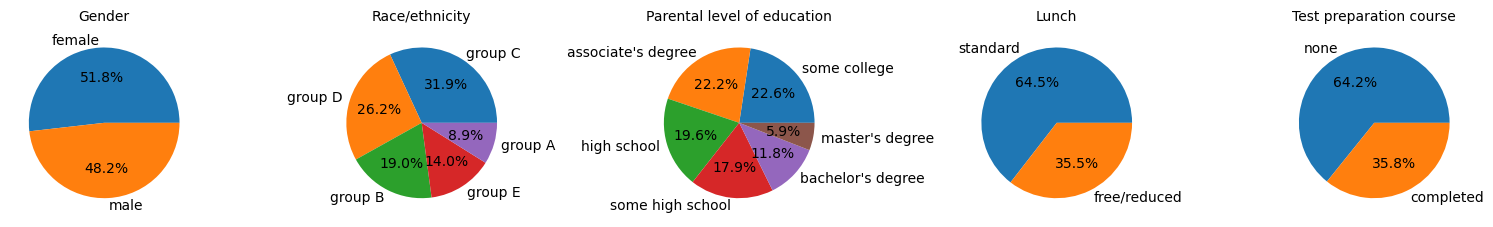

In [39]:
fig , axes = plt.subplots(1,5)

for count , col in enumerate (cat_col):
    ax = axes[count]
    df[col].value_counts().plot.pie(ax = ax,autopct='%1.1f%%')
    ax.set_title(col.capitalize())
    ax.set_ylabel('')
plt.tight_layout()

In [40]:
df[num_col].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

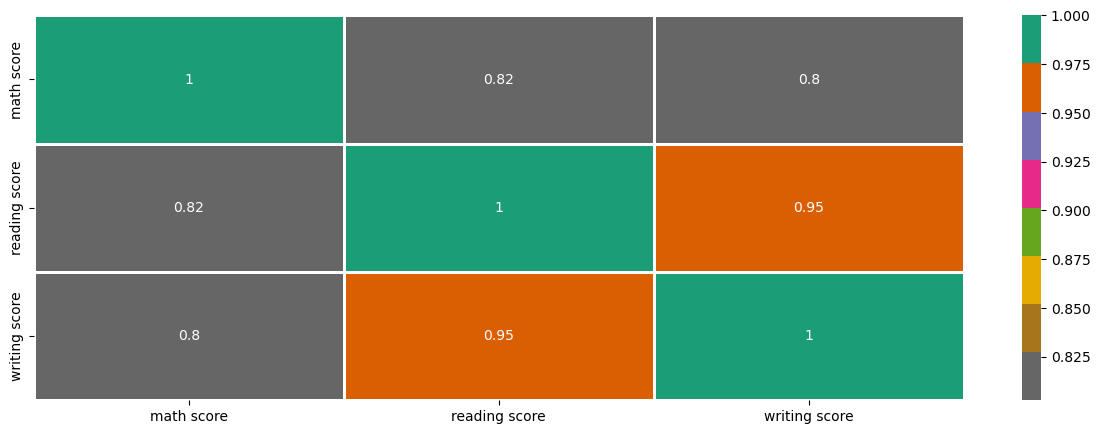

In [41]:
sns.heatmap(df[num_col].corr(),
            annot=True,
            cmap='Dark2_r',
           linewidths=2)

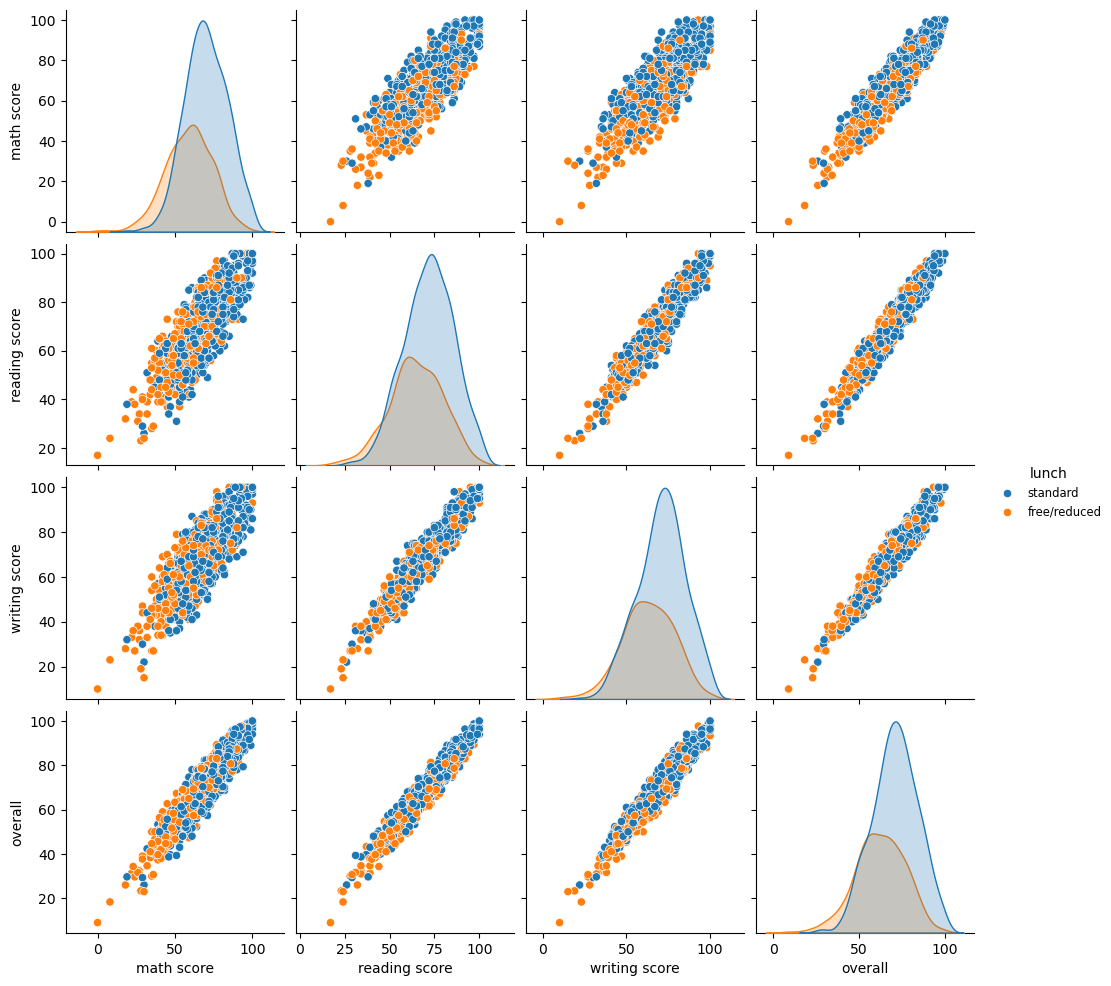

In [42]:
sns.pairplot(data=df,hue='lunch')